In [1]:
import numpy as np; np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Velocity model simulation
def CVM(Tmax,beta,sigma,v0,dt):
    T = np.arange(0,Tmax,dt)
    n = len(T)
    V = n*[0]
    V[0] = v0 # set the initial value if you want to start with a different value rather than 0
    dW = np.random.randn(n)*np.sqrt(dt) 
    for i in range(1,n):
        V[i] = V[i-1] - beta*V[i-1] * dt  + sigma *dW[i]
    return(V) # mean 0 OU process

In [3]:
n=CVM(1000,1,1,0,0.1)

In [4]:
#Simulate OU motion multiple times
matrix_1 = np.zeros((10000,90))
matrix_2=np.zeros((10000,90))# create a matrix, 10000 rows, and 90 columns
for i in range(0,10000):
    n = CVM(1000,1,1,0,0.1)    
    matrix_1[i,:] = np.array(n[10:100]) * np.array(n[11])
   # matrix_2[i,:] = np.array(n[10:100]) * np.array(n[10:100][::-1])# multiply 90 entries from different ranges
# I need to average across rows to get the expectation of the product

In [5]:
print(matrix_1.mean(axis=0))

[ 4.23727640e-01  4.82980611e-01  4.34985633e-01  3.85108205e-01
  3.49274113e-01  3.15911745e-01  2.87110011e-01  2.62943547e-01
  2.35937697e-01  2.16754190e-01  1.92873568e-01  1.73669963e-01
  1.58332186e-01  1.43888895e-01  1.25814401e-01  1.12531494e-01
  9.97729023e-02  8.89268284e-02  7.74683467e-02  7.06255841e-02
  6.41898850e-02  5.66520573e-02  5.10035556e-02  4.79902353e-02
  4.27792898e-02  3.80686515e-02  3.33250423e-02  2.79603750e-02
  2.62781849e-02  2.56990147e-02  2.31150953e-02  2.02521713e-02
  2.10617727e-02  1.72062843e-02  1.39839649e-02  1.17683724e-02
  1.20465402e-02  1.26810905e-02  1.02093943e-02  9.20299720e-03
  7.44837195e-03  8.18387859e-03  5.19918987e-03  5.38998727e-03
  2.56005852e-03  2.32819101e-03  2.97209261e-03  6.63725269e-03
  9.04648583e-03  6.85419670e-03  5.91493700e-03  2.52047047e-03
  3.75974740e-03  8.86543823e-04 -9.23994986e-04 -2.30672330e-04
  3.95190701e-03  4.45301456e-03  1.08778660e-03  1.24582832e-04
  1.76739371e-03  1.60469

In [6]:
print(0.5*np.exp(-1))

0.18393972058572117


In [8]:
print(0.5*np.exp(-4))

0.00915781944436709


In [ ]:
# the numerical results decrease much slower than the theoretical results


In [56]:
# We look at lags 0,...,100
matrix_2=np.zeros((10000,100))
for i in range(0,10000):
    n = CVM(1000,1,1,0,0.1)    
    matrix_2[i,:] = np.array(n[10:110]) * np.array(n[10])
    

In [57]:
#np.array(n[50:140])[::-1]# reverse order
#np.array(range(0,100))[:np.int((len(t)/2))] #takes first half
#len(t)/2

In [58]:
# Numerical covariance
print(matrix_2.mean(axis=0))

[ 4.57652331e-01  4.13678566e-01  3.71326845e-01  3.38154805e-01
  3.04242830e-01  2.74390953e-01  2.49639600e-01  2.23110021e-01
  2.01123299e-01  1.76633763e-01  1.62144456e-01  1.45692611e-01
  1.35155728e-01  1.22695482e-01  1.12345598e-01  1.01306734e-01
  9.40615332e-02  8.06326171e-02  7.29167779e-02  6.39520388e-02
  5.32303050e-02  4.64882928e-02  4.41561821e-02  4.03248277e-02
  3.68080145e-02  3.05179988e-02  2.30888733e-02  1.95652392e-02
  1.76275954e-02  1.55021226e-02  1.44486200e-02  1.29172538e-02
  1.18292750e-02  1.20585558e-02  1.44401427e-02  1.35987495e-02
  1.34992158e-02  1.40896460e-02  1.32678959e-02  9.84248683e-03
  1.11918588e-02  1.12435730e-02  8.33643474e-03  5.19762308e-03
  7.73861833e-03  4.65791862e-03  4.45830717e-03  1.56017375e-03
  5.36210385e-03  1.23021036e-03  2.31794474e-03  1.76041298e-03
 -9.56299179e-04 -5.70100488e-03 -7.93351359e-03 -7.30650403e-03
 -8.74733185e-03 -1.06667787e-02 -1.09690629e-02 -9.48649683e-03
 -8.72016799e-03 -6.56563

In [59]:
# Theoretical covariance
sigma = 1
a = 1 
s= 10 # same as before when calculating numerical covariance, only the lag matters when dealing with stationary processes such
# as OU model
t = np.array(range(10,110))
theor_cov = np.zeros(len(t))
theor_cov = sigma/(2*a)*(np.exp(-a*np.abs(t-s)) - np.exp(-a*(t+s)))
       


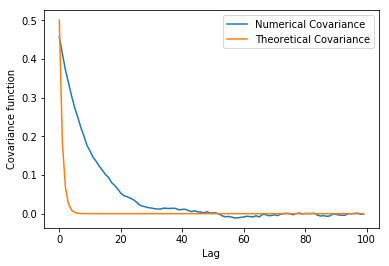

In [62]:
plt.plot(matrix_2.mean(axis=0),label="Numerical Covariance")
plt.plot(theor_cov,label='Theoretical Covariance')
plt.xlabel('Lag')
plt.ylabel('Covariance function')
plt.legend()
plt.show()